### Importación de datos



In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [26]:
# Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Mostrar los resultados
print("Ingreso total Tienda 1: ${:,.0f}".format(ingreso_tienda1))
print("Ingreso total Tienda 2: ${:,.0f}".format(ingreso_tienda2))
print("Ingreso total Tienda 3: ${:,.0f}".format(ingreso_tienda3))
print("Ingreso total Tienda 4: ${:,.0f}".format(ingreso_tienda4))



Ingreso total Tienda 1: $1,150,880,400
Ingreso total Tienda 2: $1,116,343,500
Ingreso total Tienda 3: $1,098,019,600
Ingreso total Tienda 4: $1,038,375,700


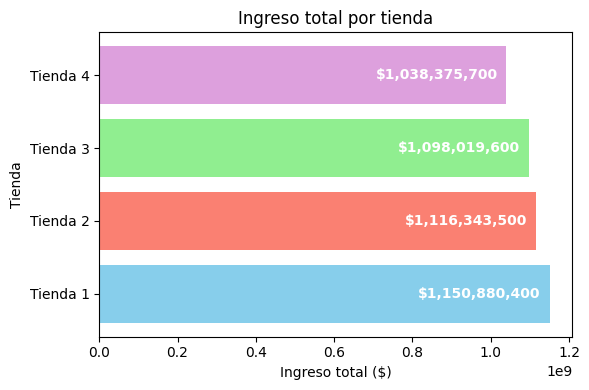

In [27]:
import matplotlib.pyplot as plt

# Datos
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos_totales = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Gráfico horizontal
plt.figure(figsize=(6,4))
bars = plt.barh(tiendas, ingresos_totales, color=["skyblue", "salmon", "lightgreen", "plum"])

# Título y ejes
plt.title("Ingreso total por tienda")
plt.xlabel("Ingreso total ($)")
plt.ylabel("Tienda")

# Mostrar valores dentro de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width*0.98, bar.get_y() + bar.get_height()/2, f"${width:,.0f}", va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [28]:
# Cantidad de productos vendidos por categoría en cada tienda
cat_tienda1 = tienda.groupby("Categoría del Producto").size().sort_values(ascending=False)
cat_tienda2 = tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False)
cat_tienda3 = tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False)
cat_tienda4 = tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False)

# Mostrar resultados
print("Tienda 1 - Ventas por categoría:\n", cat_tienda1, "\n")
print("Tienda 2 - Ventas por categoría:\n", cat_tienda2, "\n")
print("Tienda 3 - Ventas por categoría:\n", cat_tienda3, "\n")
print("Tienda 4 - Ventas por categoría:\n", cat_tienda4, "\n")


Tienda 1 - Ventas por categoría:
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64 

Tienda 2 - Ventas por categoría:
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64 

Tienda 3 - Ventas por categoría:
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64 

Tienda 4 - Ventas por categoría:
 Catego

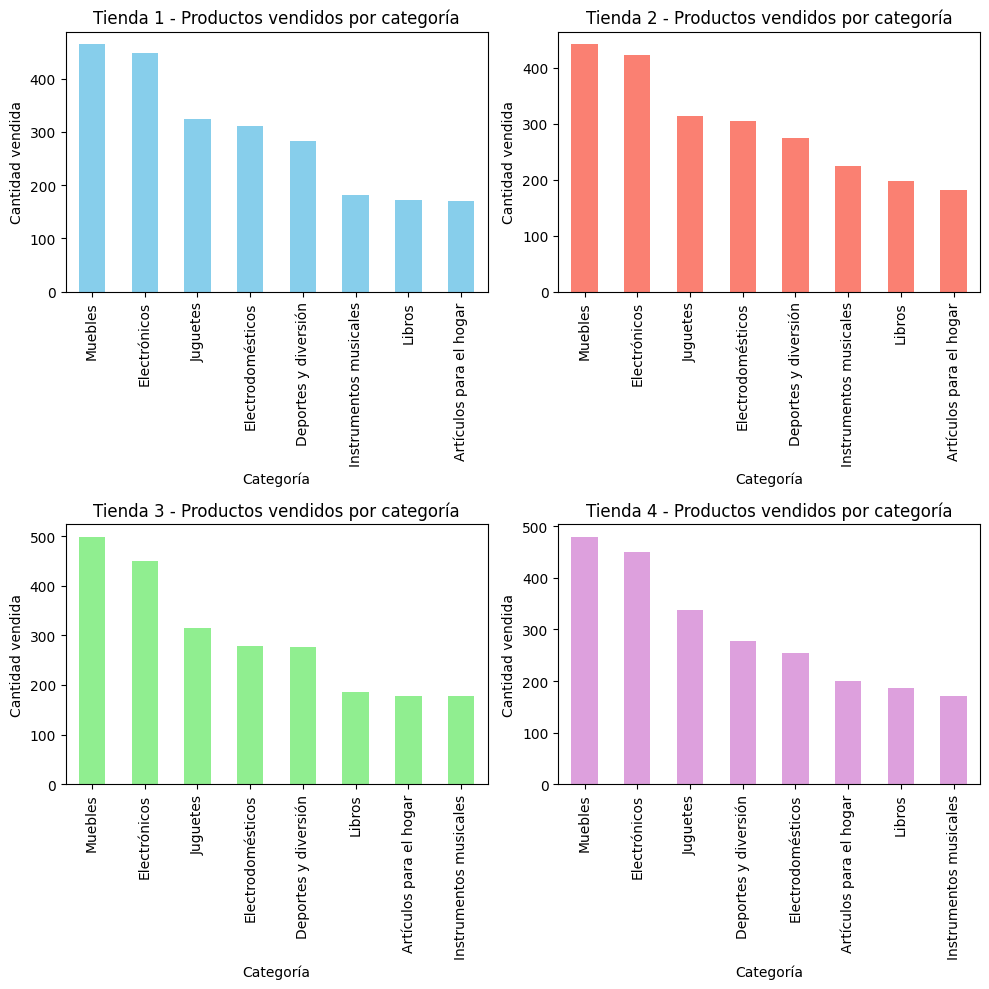

In [29]:
import matplotlib.pyplot as plt

# Agrupar por categoría y contar productos vendidos en cada tienda
cat_tienda1 = tienda.groupby("Categoría del Producto").size().sort_values(ascending=False)
cat_tienda2 = tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False)
cat_tienda3 = tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False)
cat_tienda4 = tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False)

# Crear figura con 4 gráficos (uno por tienda)
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
cat_tienda1.plot(kind='bar', color='skyblue')
plt.title("Tienda 1 - Productos vendidos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad vendida")

plt.subplot(2, 2, 2)
cat_tienda2.plot(kind='bar', color='salmon')
plt.title("Tienda 2 - Productos vendidos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad vendida")

plt.subplot(2, 2, 3)
cat_tienda3.plot(kind='bar', color='lightgreen')
plt.title("Tienda 3 - Productos vendidos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad vendida")

plt.subplot(2, 2, 4)
cat_tienda4.plot(kind='bar', color='plum')
plt.title("Tienda 4 - Productos vendidos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad vendida")

plt.tight_layout()
plt.show()


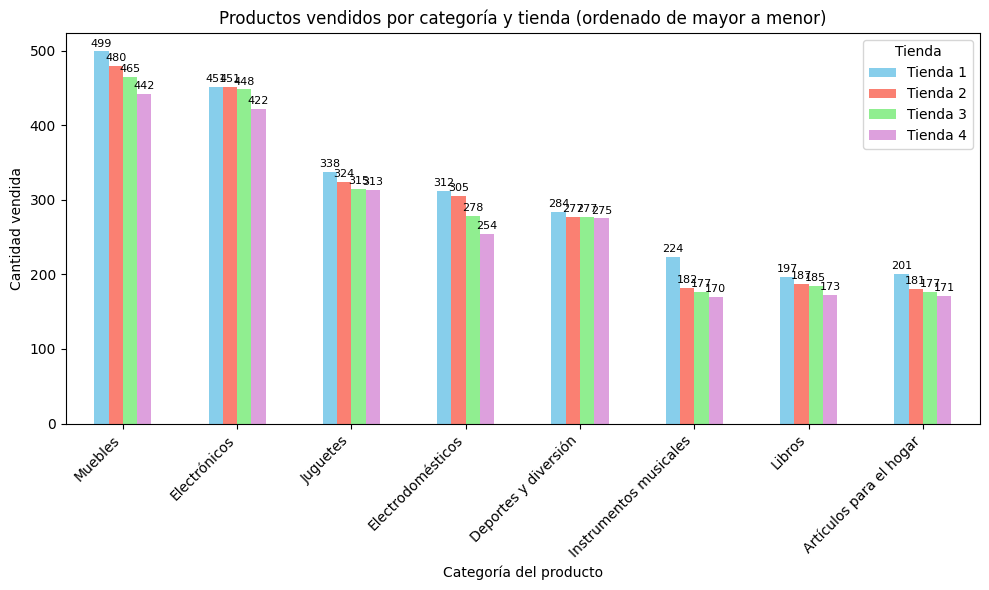

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por categoría para cada tienda
cat_tienda1 = tienda.groupby("Categoría del Producto").size()
cat_tienda2 = tienda2.groupby("Categoría del Producto").size()
cat_tienda3 = tienda3.groupby("Categoría del Producto").size()
cat_tienda4 = tienda4.groupby("Categoría del Producto").size()

# Combinar en un solo DataFrame
categorias_df = pd.concat(
    [cat_tienda1, cat_tienda2, cat_tienda3, cat_tienda4],
    axis=1
).fillna(0)

# Renombrar columnas
categorias_df.columns = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calcular el total por categoría y ordenar de mayor a menor
categorias_df["Total"] = categorias_df.sum(axis=1)
categorias_df = categorias_df.sort_values(by="Total", ascending=False)

# Para cada categoría, reordenar las columnas (tiendas) de mayor a menor
# (esto solo cambia el orden de las columnas, no las etiquetas)
for i in categorias_df.index:
    categorias_df.loc[i, ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]] = \
        categorias_df.loc[i, ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]].sort_values(ascending=False).values

# Eliminar columna Total antes de graficar
categorias_df = categorias_df.drop(columns="Total")

# Colores personalizados (manteniendo el orden original)
colores = ["skyblue", "salmon", "lightgreen", "plum"]

# Crear gráfico
ax = categorias_df.plot(
    kind="bar",
    figsize=(10,6),
    color=colores
)

# Personalización
plt.title("Productos vendidos por categoría y tienda (ordenado de mayor a menor)")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad vendida")
plt.legend(title="Tienda")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Mostrar valores sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.show()




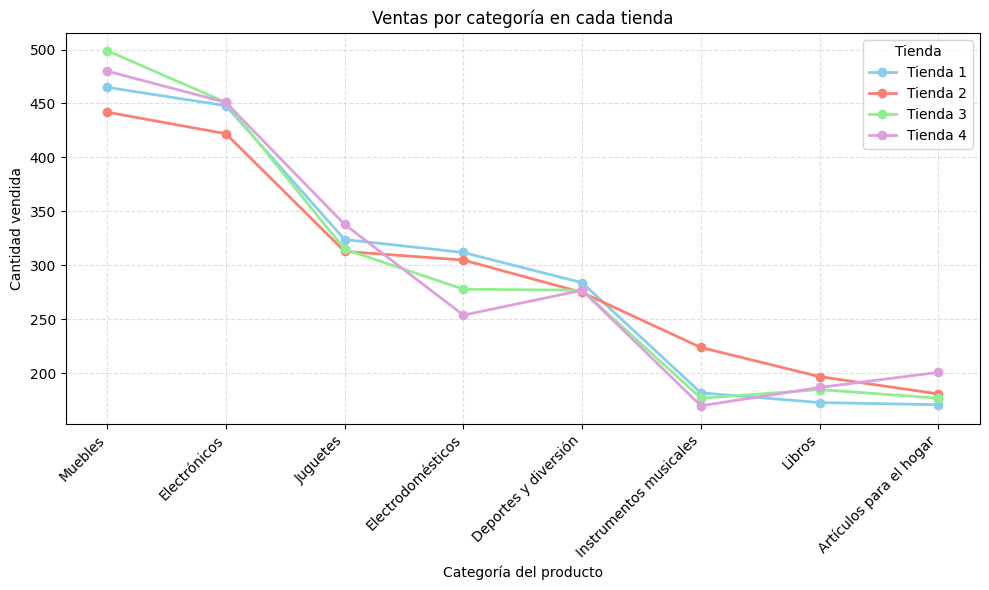

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por categoría para cada tienda
cat_tienda1 = tienda.groupby("Categoría del Producto").size()
cat_tienda2 = tienda2.groupby("Categoría del Producto").size()
cat_tienda3 = tienda3.groupby("Categoría del Producto").size()
cat_tienda4 = tienda4.groupby("Categoría del Producto").size()

# Combinar en un solo DataFrame
categorias_df = pd.concat(
    [cat_tienda1, cat_tienda2, cat_tienda3, cat_tienda4],
    axis=1
).fillna(0)

# Renombrar columnas
categorias_df.columns = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Ordenar las categorías por total de ventas (de mayor a menor)
categorias_df["Total"] = categorias_df.sum(axis=1)
categorias_df = categorias_df.sort_values(by="Total", ascending=False)
categorias_df = categorias_df.drop(columns="Total")

# Colores por tienda (mismos que antes)
colores = ["skyblue", "salmon", "lightgreen", "plum"]

# Crear gráfico de líneas
plt.figure(figsize=(10,6))
for i, tienda in enumerate(categorias_df.columns):
    plt.plot(
        categorias_df.index,
        categorias_df[tienda],
        marker='o',
        linewidth=2,
        color=colores[i],
        label=tienda
    )

# Personalización
plt.title("Ventas por categoría en cada tienda")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [33]:
# Reload the dataframes to ensure they are in the correct format
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Calificación promedio de cada tienda
calif_tienda1 = tienda["Calificación"].mean()
calif_tienda2 = tienda2["Calificación"].mean()
calif_tienda3 = tienda3["Calificación"].mean()
calif_tienda4 = tienda4["Calificación"].mean()

# Mostrar los resultados
print("Calificación promedio Tienda 1:", round(calif_tienda1, 2))
print("Calificación promedio Tienda 2:", round(calif_tienda2, 2))
print("Calificación promedio Tienda 3:", round(calif_tienda3, 2))
print("Calificación promedio Tienda 4:", round(calif_tienda4, 2))

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.0


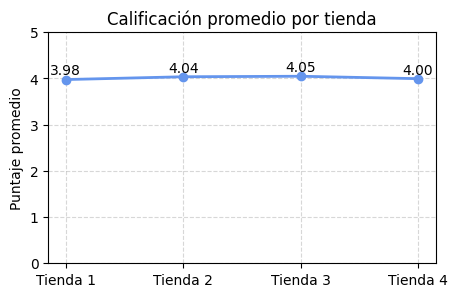

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame resumen
calificaciones = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [calif_tienda1, calif_tienda2, calif_tienda3, calif_tienda4]
})

# Gráfico de líneas
plt.figure(figsize=(5,3))
plt.plot(calificaciones["Tienda"], calificaciones["Calificación Promedio"], marker='o', linestyle='-', color='cornflowerblue', linewidth=2)

# Título y ejes
plt.title("Calificación promedio por tienda")
plt.ylabel("Puntaje promedio")
plt.ylim(0, 5)

# Mostrar los valores sobre cada punto
for i, v in enumerate(calificaciones["Calificación Promedio"]):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



# 4. Productos más y menos vendidos

In [35]:
import matplotlib.pyplot as plt

# Contar ventas por producto en cada tienda
ventas_tienda1 = tienda.groupby("Producto").size().sort_values(ascending=False)
ventas_tienda2 = tienda2.groupby("Producto").size().sort_values(ascending=False)
ventas_tienda3 = tienda3.groupby("Producto").size().sort_values(ascending=False)
ventas_tienda4 = tienda4.groupby("Producto").size().sort_values(ascending=False)

# Mostrar los productos más y menos vendidos en cada tienda
print("Tienda 1:")
print("Más vendido:", ventas_tienda1.idxmax(), "-", ventas_tienda1.max(), "ventas")
print("Menos vendido:", ventas_tienda1.idxmin(), "-", ventas_tienda1.min(), "venta(s)\n")

print("Tienda 2:")
print("Más vendido:", ventas_tienda2.idxmax(), "-", ventas_tienda2.max(), "ventas")
print("Menos vendido:", ventas_tienda2.idxmin(), "-", ventas_tienda2.min(), "venta(s)\n")

print("Tienda 3:")
print("Más vendido:", ventas_tienda3.idxmax(), "-", ventas_tienda3.max(), "ventas")
print("Menos vendido:", ventas_tienda3.idxmin(), "-", ventas_tienda3.min(), "venta(s)\n")

print("Tienda 4:")
print("Más vendido:", ventas_tienda4.idxmax(), "-", ventas_tienda4.max(), "ventas")
print("Menos vendido:", ventas_tienda4.idxmin(), "-", ventas_tienda4.min(), "venta(s)\n")

Tienda 1:
Más vendido: Armario - 60 ventas
Menos vendido: Celular ABXY - 33 venta(s)

Tienda 2:
Más vendido: Iniciando en programación - 65 ventas
Menos vendido: Juego de mesa - 32 venta(s)

Tienda 3:
Más vendido: Kit de bancas - 57 ventas
Menos vendido: Bloques de construcción - 35 venta(s)

Tienda 4:
Más vendido: Cama box - 62 ventas
Menos vendido: Guitarra eléctrica - 33 venta(s)



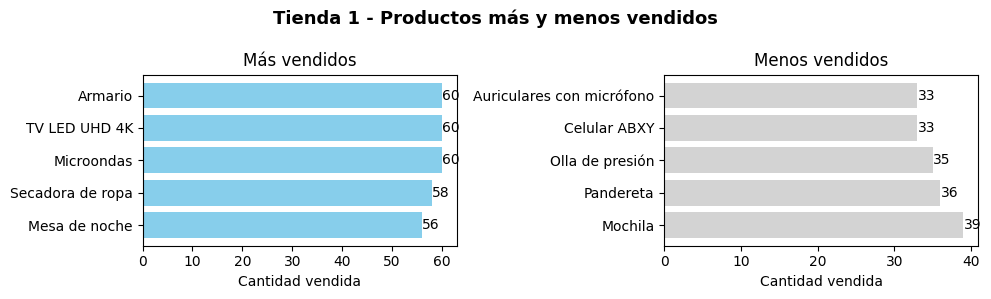

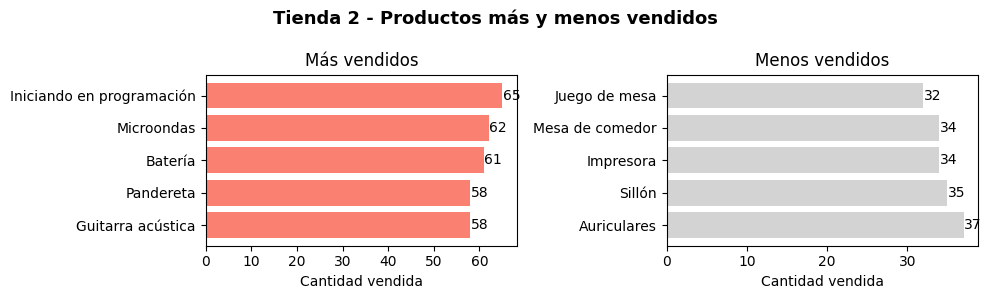

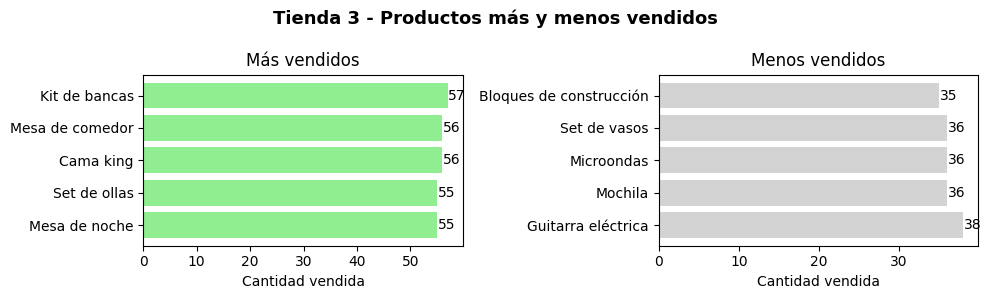

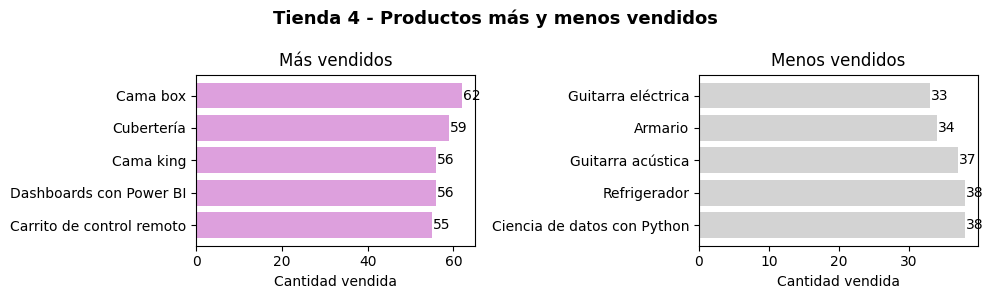

In [36]:
import matplotlib.pyplot as plt

# Contar ventas por producto en cada tienda
ventas_tienda1 = tienda.groupby("Producto").size().sort_values(ascending=False)
ventas_tienda2 = tienda2.groupby("Producto").size().sort_values(ascending=False)
ventas_tienda3 = tienda3.groupby("Producto").size().sort_values(ascending=False)
ventas_tienda4 = tienda4.groupby("Producto").size().sort_values(ascending=False)

# Función para graficar más y menos vendidos
def graficar_mas_menos(ventas, titulo, color_mas, color_menos):
    top5 = ventas.head(5)
    bottom5 = ventas.tail(5)

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle(titulo, fontsize=13, fontweight='bold')

    # Más vendidos
    axes[0].barh(top5.index[::-1], top5.values[::-1], color=color_mas)
    axes[0].set_title("Más vendidos")
    axes[0].set_xlabel("Cantidad vendida")
    for i, v in enumerate(top5.values[::-1]):
        axes[0].text(v + 0.1, i, str(v), va='center')

    # Menos vendidos
    axes[1].barh(bottom5.index, bottom5.values, color=color_menos)
    axes[1].set_title("Menos vendidos")
    axes[1].set_xlabel("Cantidad vendida")
    for i, v in enumerate(bottom5.values):
        axes[1].text(v + 0.1, i, str(v), va='center')

    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_mas_menos(ventas_tienda1, "Tienda 1 - Productos más y menos vendidos", "skyblue", "lightgray")
graficar_mas_menos(ventas_tienda2, "Tienda 2 - Productos más y menos vendidos", "salmon", "lightgray")
graficar_mas_menos(ventas_tienda3, "Tienda 3 - Productos más y menos vendidos", "lightgreen", "lightgray")
graficar_mas_menos(ventas_tienda4, "Tienda 4 - Productos más y menos vendidos", "plum", "lightgray")



# 5. Envío promedio por tienda

In [37]:
# Calcular el costo de envío promedio por tienda
envio_tienda1 = tienda["Costo de envío"].mean()
envio_tienda2 = tienda2["Costo de envío"].mean()
envio_tienda3 = tienda3["Costo de envío"].mean()
envio_tienda4 = tienda4["Costo de envío"].mean()

# Mostrar resultados
print("Costo de envío promedio Tienda 1:", round(envio_tienda1, 2))
print("Costo de envío promedio Tienda 2:", round(envio_tienda2, 2))
print("Costo de envío promedio Tienda 3:", round(envio_tienda3, 2))
print("Costo de envío promedio Tienda 4:", round(envio_tienda4, 2))


Costo de envío promedio Tienda 1: 26018.61
Costo de envío promedio Tienda 2: 25216.24
Costo de envío promedio Tienda 3: 24805.68
Costo de envío promedio Tienda 4: 23459.46


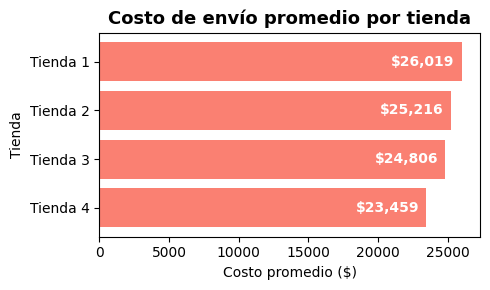

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear el resumen con los promedios
costos_envio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo de envío promedio": [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]
}).sort_values(by="Costo de envío promedio", ascending=True)

# Gráfico horizontal
plt.figure(figsize=(5,3))
bars = plt.barh(costos_envio["Tienda"], costos_envio["Costo de envío promedio"], color="salmon")

# Título y ejes
plt.title("Costo de envío promedio por tienda", fontsize=13, fontweight="bold")
plt.xlabel("Costo promedio ($)")
plt.ylabel("Tienda")

# Mostrar valores en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width*0.98, bar.get_y() + bar.get_height()/2, f"${width:,.0f}", va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()



#6. Análisis del desempeño geográfico

In [39]:
# Convertir lat y lon a numérico (coerce convierte errores en NaN)
tienda["lat"] = pd.to_numeric(tienda["lat"], errors='coerce')
tienda["lon"] = pd.to_numeric(tienda["lon"], errors='coerce')

tienda2["lat"] = pd.to_numeric(tienda2["lat"], errors='coerce')
tienda2["lon"] = pd.to_numeric(tienda2["lon"], errors='coerce')

tienda3["lat"] = pd.to_numeric(tienda3["lat"], errors='coerce')
tienda3["lon"] = pd.to_numeric(tienda3["lon"], errors='coerce')

tienda4["lat"] = pd.to_numeric(tienda4["lat"], errors='coerce')
tienda4["lon"] = pd.to_numeric(tienda4["lon"], errors='coerce')


In [41]:
!pip install contextily geopandas --quiet

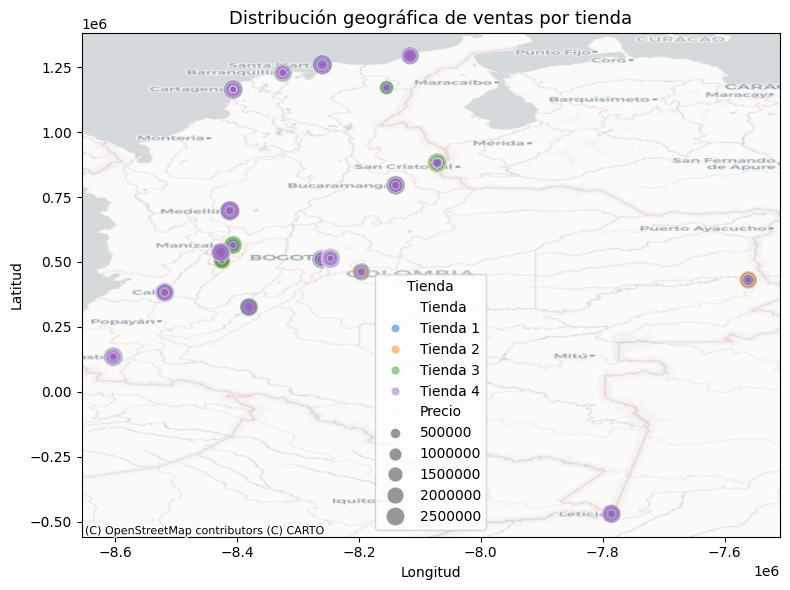

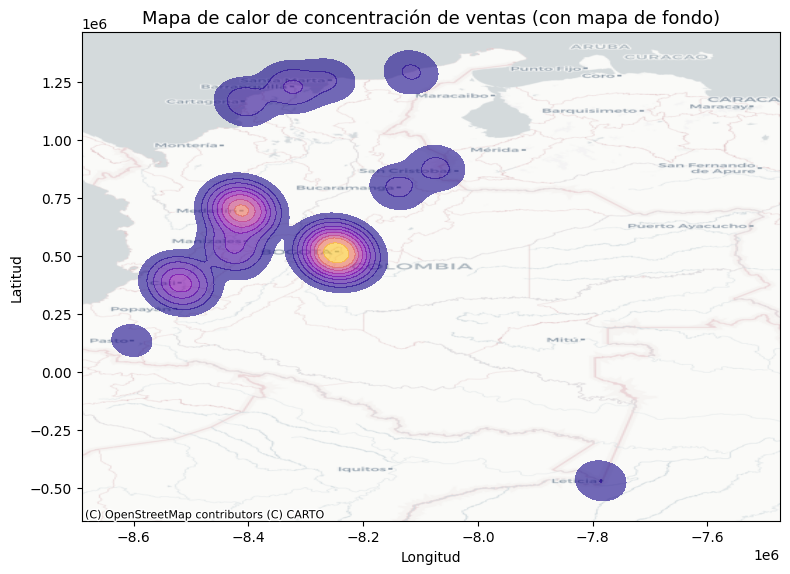

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx

# Convertir el DataFrame a GeoDataFrame
gdf = gpd.GeoDataFrame(
    tiendas,
    geometry=gpd.points_from_xy(tiendas["lon"], tiendas["lat"]),
    crs="EPSG:4326"
)

# Convertir a proyección métrica (necesario para agregar mapa base)
gdf = gdf.to_crs(epsg=3857)

# ======================================================
# Gráfico de dispersión con mapa de fondo
# ======================================================
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
sns.scatterplot(
    data=gdf,
    x=gdf.geometry.x, y=gdf.geometry.y,
    hue="Tienda",
    palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd"],  # colores equilibrados (azul, naranja, verde, violeta)
    size="Precio",
    sizes=(20,200),
    alpha=0.5,
    ax=ax
)


# Agregar mapa base más nítido
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=1)

plt.title("Distribución geográfica de ventas por tienda", fontsize=13)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# ======================================================
#  Mapa de calor (Heatmap) de concentración de ventas
# ======================================================
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
sns.kdeplot(
    data=gdf,
    x=gdf.geometry.x, y=gdf.geometry.y,
    fill=True,
    cmap="plasma",
    alpha=0.6,
    ax=ax
)

# Agregar mapa base debajo del heatmap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=1)

plt.title("Mapa de calor de concentración de ventas (con mapa de fondo)", fontsize=13)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.tight_layout()
plt.show()


---

# **Informe Final — Recomendación de Venta**

---

El objetivo de este análisis fue determinar **qué tienda conviene vender** para que el Sr. Juan reinvierta en un nuevo negocio.  
Se evaluaron los ingresos totales, las calificaciones de clientes, las ventas por categoría, los productos más y menos vendidos y el costo de envío promedio.

---

## **Resultados principales**

---

- **Ingresos totales:** la **Tienda 1** tuvo el mayor ingreso (\$1.150.880.400) y la **Tienda 4** el menor (\$1.038.375.700).
- **Calificaciones:** la **Tienda 3 (4.05)** y la **Tienda 2 (4.04)** fueron las mejor valoradas.  
- **Categorías:** *Muebles* y *Electrónicos* dominaron en todas las tiendas, aunque la **Tienda 4** no destacó en ninguna.  
- **Costo de envío:** la **Tienda 4** tuvo el envío más bajo (**$23.459**), pero sin impacto positivo en las ventas.
- **Ubicación**: **la Tienda 4** presenta menos densidad de ventas, lo que refuerza su bajo volumen total.
---

## **Análisis Integrado**

---

| Tienda | Ingresos | Calificación | Envío Promedio | Observaciones |
|:--------|:-----------:|:-------------:|:----------------:|:-----------------------------------------------|
| **Tienda 1** | 🟢 Alto | 🔴 Más baja | 🔴 Más caro | Buen volumen, pero menor satisfacción. |
| **Tienda 2** | 🟢 Medio-alto | 🟢 Alta | 🟡 Media | Balance ideal entre rentabilidad y satisfacción. |
| **Tienda 3** | 🟡 Medio | 🟢 Alta | 🟡 Media | Buenas reseñas y ventas estables. |
| **Tienda 4** | 🔴 Bajo | 🟡 Promedio | 🟢 Más barato | Menor ingreso y escasa diferenciación. |

---

## **Conclusión**

---

Se recomienda **vender la Tienda 4**, ya que:

1. Registra los **menores ingresos** y una **presencia comercial más limitada**.  
2. No lidera en ninguna categoría importante.  
3. Su **satisfacción del cliente es promedio**, sin ventajas competitivas.  

Mantener las **Tiendas 1, 2 y 3** permitirá concentrar los recursos en unidades con **mejor rentabilidad y percepción del cliente**, optimizando así la inversión futura del Sr. Juan.
